# Phase 1: Introduction to Quantum Computing

**A comprehensive exploration of single-qubit quantum mechanics**

---

## Overview

This notebook provides a complete introduction to quantum computing fundamentals:
- Qubit representation and state vectors
- Quantum gates and unitary operations
- Bloch sphere visualization
- Measurement and the Born rule
- Two-qubit systems and entanglement

**Reference:** Imperial College London Quantum Information Notes

---

In [17]:
# Setup: Add src to path
import sys
from pathlib import Path

# Add parent directory to path
notebook_dir = Path().absolute()
project_root = notebook_dir.parent
sys.path.insert(0, str(project_root / "src"))

# Imports
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex

# Our quantum computing library
from phase1_qubits.qubit import Qubit, ket_0, ket_1, ket_plus, ket_minus
from phase1_qubits.gates import (
    HADAMARD, PAULI_X, PAULI_Y, PAULI_Z, S_GATE, T_GATE,
    apply_gate, rx, ry, rz
)
from phase1_qubits.bloch_sphere import BlochSphere
from phase1_qubits.multi_qubit import (
    TwoQubitSystem, bell_phi_plus, bell_phi_minus, tensor_product
)
from phase1_qubits.two_qubit_gates import CNOT, apply_gate_to_system, apply_single_qubit_gate

# Configure plots
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 12

print("✓ Setup complete!")

✓ Setup complete!


---

## 1. Quantum States and Qubits

### 1.1 The Qubit

A **qubit** (quantum bit) is the fundamental unit of quantum information. Unlike a classical bit (0 or 1), a qubit can exist in a **superposition** of states.

#### Mathematical Representation

A qubit is represented by a state vector in a 2-dimensional complex Hilbert space $\mathbb{C}^2$:

$$|\psi\rangle = \alpha|0\rangle + \beta|1\rangle$$

where:
- $\alpha, \beta \in \mathbb{C}$ are complex amplitudes
- $|\alpha|^2 + |\beta|^2 = 1$ (normalization condition)
- $|0\rangle = \begin{pmatrix} 1 \\ 0 \end{pmatrix}$ and $|1\rangle = \begin{pmatrix} 0 \\ 1 \end{pmatrix}$ are the computational basis states

#### Measurement (Born Rule)

Upon measurement in the computational basis:
- Probability of measuring $|0\rangle$: $P(0) = |\alpha|^2$
- Probability of measuring $|1\rangle$: $P(1) = |\beta|^2$

---

### 1.2 Computational Basis States

Let's create and examine the two computational basis states:

In [18]:
# Create basis states
q0 = ket_0()  # |0⟩
q1 = ket_1()  # |1⟩

print("Computational Basis States:")
print("="*50)
print(f"|0⟩ = {q0.state}")
print(f"     {q0}")
print(f"     P(0) = {q0.prob_0():.4f}, P(1) = {q0.prob_1():.4f}")
print()
print(f"|1⟩ = {q1.state}")
print(f"     {q1}")
print(f"     P(0) = {q1.prob_0():.4f}, P(1) = {q1.prob_1():.4f}")

Computational Basis States:
|0⟩ = [1.+0.j 0.+0.j]
     |0⟩
     P(0) = 1.0000, P(1) = 0.0000

|1⟩ = [0.+0.j 1.+0.j]
     |1⟩
     P(0) = 0.0000, P(1) = 1.0000


### 1.3 Superposition States

Qubits can exist in **superposition** - a linear combination of basis states.

The **Hadamard basis** is particularly important:

$$|+\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$$
$$|-\rangle = \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle)$$

In [19]:
# Create superposition states
q_plus = ket_plus()   # |+⟩
q_minus = ket_minus() # |-⟩

print("Hadamard Basis States:")
print("="*50)
print(f"|+⟩ = {q_plus}")
print(f"     P(0) = {q_plus.prob_0():.4f}, P(1) = {q_plus.prob_1():.4f}")
print(f"     Equal superposition!")
print()
print(f"|-⟩ = {q_minus}")
print(f"     P(0) = {q_minus.prob_0():.4f}, P(1) = {q_minus.prob_1():.4f}")
print(f"     Also equal superposition (phases differ)")

Hadamard Basis States:
|+⟩ = 0.71|0⟩ + 0.71|1⟩
     P(0) = 0.5000, P(1) = 0.5000
     Equal superposition!

|-⟩ = 0.71|0⟩ -0.71|1⟩
     P(0) = 0.5000, P(1) = 0.5000
     Also equal superposition (phases differ)


### 1.4 Custom Superposition

We can create any normalized qubit state:

In [20]:
# Create a custom state: 70% chance of |0⟩, 30% chance of |1⟩
psi = Qubit([np.sqrt(0.7), np.sqrt(0.3)])

print("Custom Superposition State:")
print("="*50)
print(f"|ψ⟩ = {psi}")
print(f"P(0) = {psi.prob_0():.4f}")
print(f"P(1) = {psi.prob_1():.4f}")
print(f"\nBloch coordinates: {psi.bloch_coordinates()}")

Custom Superposition State:
|ψ⟩ = 0.84|0⟩ + 0.55|1⟩
P(0) = 0.7000
P(1) = 0.3000

Bloch coordinates: (np.float64(0.916515138991168), np.float64(0.0), np.float64(0.40000000000000013))


---

## 2. The Bloch Sphere

### 2.1 Geometric Representation

Any single-qubit state can be visualized on the **Bloch sphere** - a unit sphere in 3D space.

#### Bloch Sphere Parametrization

A general qubit state can be written as:

$$|\psi\rangle = \cos\frac{\theta}{2}|0\rangle + e^{i\phi}\sin\frac{\theta}{2}|1\rangle$$

where $\theta \in [0,\pi]$ is the polar angle and $\phi \in [0, 2\pi)$ is the azimuthal angle.

#### Bloch Coordinates

The Cartesian coordinates are given by expectation values of Pauli operators:

$$x = \langle \sigma_x \rangle = 2\text{Re}(\alpha^*\beta)$$
$$y = \langle \sigma_y \rangle = 2\text{Im}(\alpha^*\beta)$$
$$z = \langle \sigma_z \rangle = |\alpha|^2 - |\beta|^2$$

---

### 2.2 Visualizing Basis States

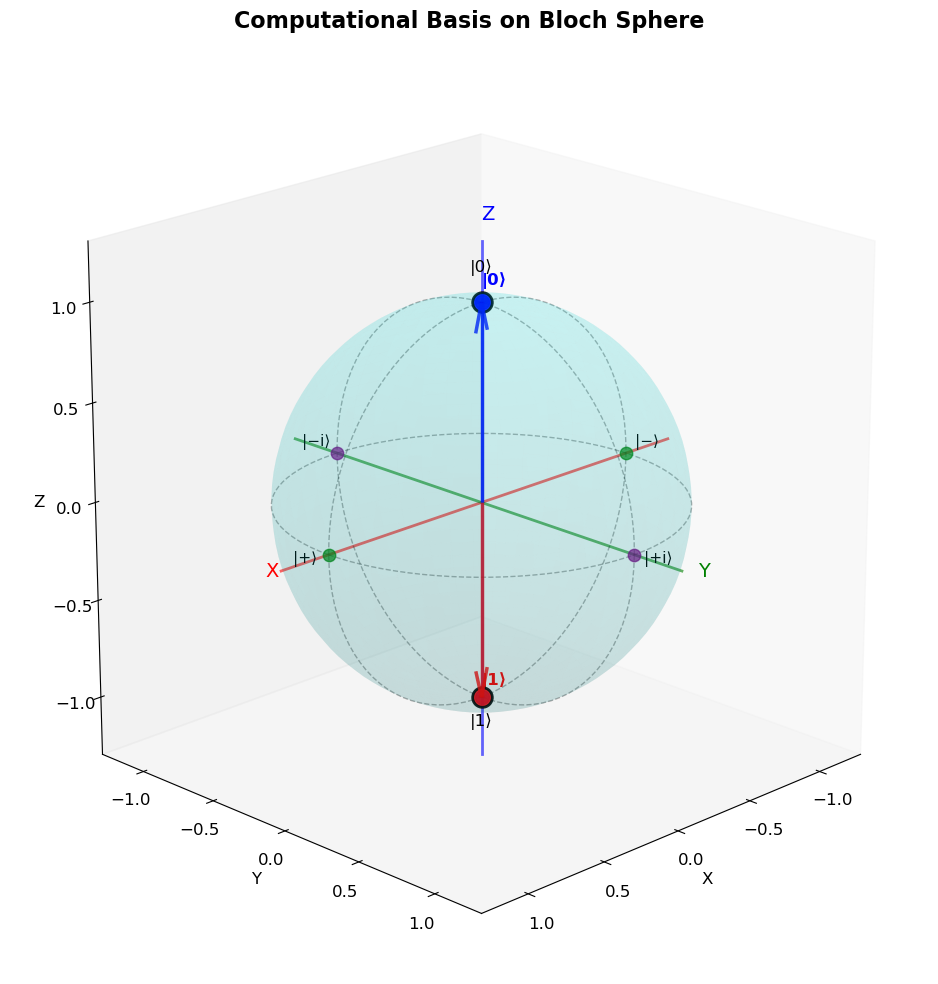

Bloch coordinates:
|0⟩: (np.float64(0.0), np.float64(0.0), np.float64(1.0))
|1⟩: (np.float64(0.0), np.float64(0.0), np.float64(-1.0))


In [21]:
# Create Bloch sphere with computational basis
bloch = BlochSphere(figsize=(12, 10))
bloch.add_qubit(ket_0(), label="|0⟩", color='blue')
bloch.add_qubit(ket_1(), label="|1⟩", color='red')
bloch.show(title="Computational Basis on Bloch Sphere")

print("Bloch coordinates:")
print(f"|0⟩: {ket_0().bloch_coordinates()}")
print(f"|1⟩: {ket_1().bloch_coordinates()}")

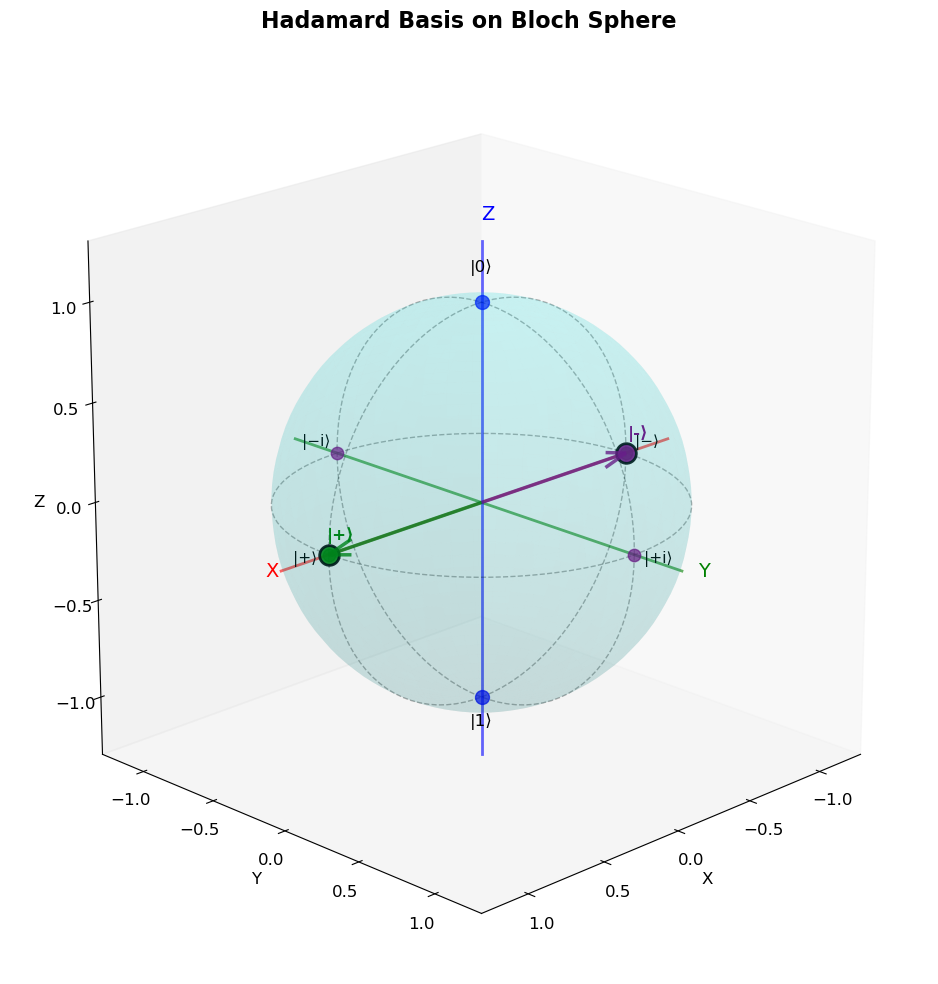

Bloch coordinates:
|+⟩: (np.float64(1.0000000000000002), np.float64(0.0), np.float64(0.0))
|-⟩: (np.float64(-1.0000000000000002), np.float64(0.0), np.float64(0.0))


In [22]:
# Visualize Hadamard basis
bloch = BlochSphere(figsize=(12, 10))
bloch.add_qubit(ket_plus(), label="|+⟩", color='green')
bloch.add_qubit(ket_minus(), label="|-⟩", color='purple')
bloch.show(title="Hadamard Basis on Bloch Sphere")

print("Bloch coordinates:")
print(f"|+⟩: {ket_plus().bloch_coordinates()}")
print(f"|-⟩: {ket_minus().bloch_coordinates()}")

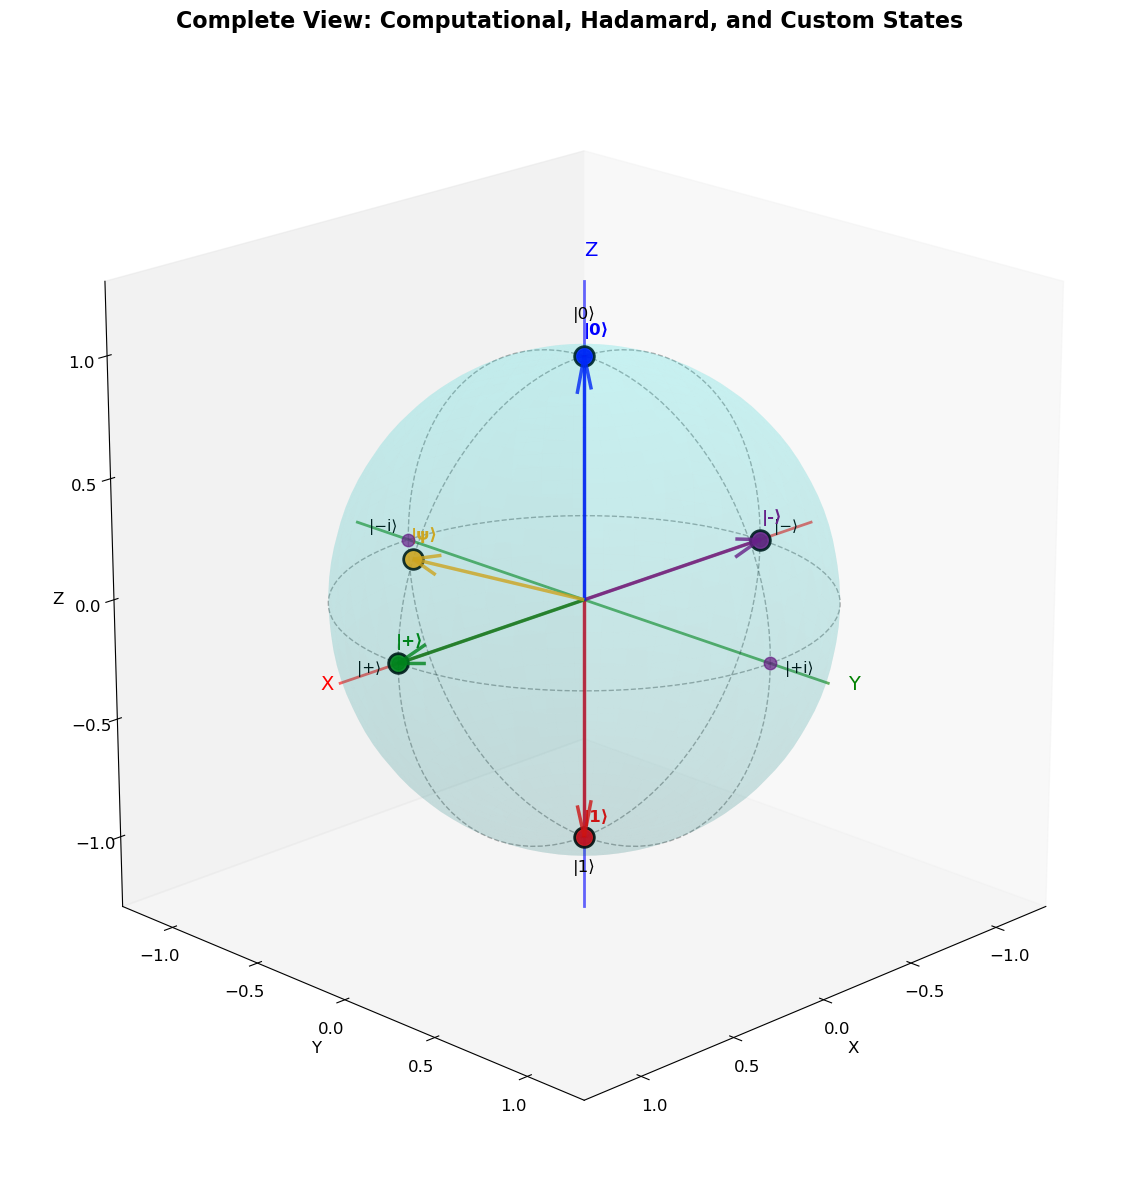

In [23]:
# Visualize all important states together
bloch = BlochSphere(figsize=(14, 12))
bloch.add_qubit(ket_0(), label="|0⟩", color='blue')
bloch.add_qubit(ket_1(), label="|1⟩", color='red')
bloch.add_qubit(ket_plus(), label="|+⟩", color='green')
bloch.add_qubit(ket_minus(), label="|-⟩", color='purple')

# Add a custom superposition
psi = Qubit([np.sqrt(0.7), np.sqrt(0.3)])
bloch.add_qubit(psi, label="|ψ⟩", color='orange')

bloch.show(title="Complete View: Computational, Hadamard, and Custom States")

---

## 3. Quantum Gates

### 3.1 Unitary Evolution

Quantum gates are **unitary operators** $U$ that transform qubit states:

$$|\psi'\rangle = U|\psi\rangle$$

Unitarity ensures $U^\dagger U = I$, which preserves normalization.

---

### 3.2 Pauli Gates

The **Pauli operators** are fundamental single-qubit gates:

$$X = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}, \quad
Y = \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix}, \quad
Z = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}$$

**Geometric interpretation:** 180° rotations around X, Y, Z axes of the Bloch sphere.

**Effects:**
- $X$: Bit flip ($|0\rangle \leftrightarrow |1\rangle$)
- $Y$: Bit + phase flip
- $Z$: Phase flip ($|1\rangle \to -|1\rangle$)

---

In [24]:
# Demonstrate Pauli gates
q = ket_0()

print("Pauli Gates on |0⟩:")
print("="*50)
print(f"Initial:  {q}")
print(f"After X:  {apply_gate(q, PAULI_X)}  (bit flip)")
print(f"After Y:  {apply_gate(q, PAULI_Y)}  (bit + phase flip)")
print(f"After Z:  {apply_gate(q, PAULI_Z)}  (no change - global phase)")

Pauli Gates on |0⟩:
Initial:  |0⟩
After X:  |1⟩  (bit flip)
After Y:   (0.00+1.00j)|1⟩  (bit + phase flip)
After Z:  |0⟩  (no change - global phase)


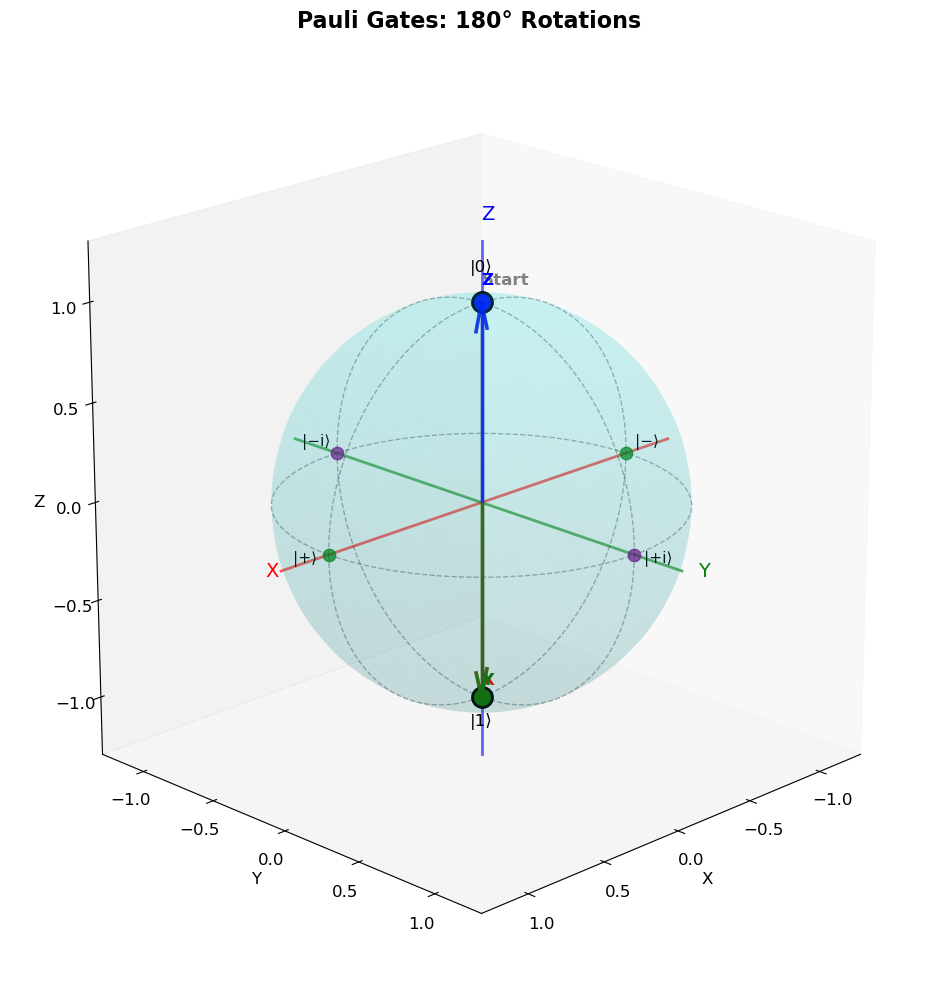

In [25]:
# Visualize Pauli rotations on Bloch sphere
q0 = ket_0()

bloch = BlochSphere(figsize=(12, 10))
bloch.add_qubit(q0, label="Start", color='gray')
bloch.add_qubit(apply_gate(q0, PAULI_X), label="X", color='red')
bloch.add_qubit(apply_gate(q0, PAULI_Y), label="Y", color='green')
bloch.add_qubit(apply_gate(q0, PAULI_Z), label="Z", color='blue')
bloch.show(title="Pauli Gates: 180° Rotations")

### 3.3 Hadamard Gate

The **Hadamard gate** creates superposition:

$$H = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix}$$

**Effects:**
- $H|0\rangle = |+\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$
- $H|1\rangle = |-\rangle = \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle)$

**Geometric interpretation:** 180° rotation around the axis between X and Z (the diagonal).

---

In [26]:
# Demonstrate Hadamard gate
print("Hadamard Gate (Creating Superposition):")
print("="*50)
q0 = ket_0()
q1 = ket_1()

print(f"H|0⟩ = {apply_gate(q0, HADAMARD)}")
print(f"     = |+⟩ (equal superposition)")
print()
print(f"H|1⟩ = {apply_gate(q1, HADAMARD)}")
print(f"     = |-⟩ (equal superposition with minus sign)")

Hadamard Gate (Creating Superposition):
H|0⟩ = 0.71|0⟩ + 0.71|1⟩
     = |+⟩ (equal superposition)

H|1⟩ = 0.71|0⟩ -0.71|1⟩
     = |-⟩ (equal superposition with minus sign)


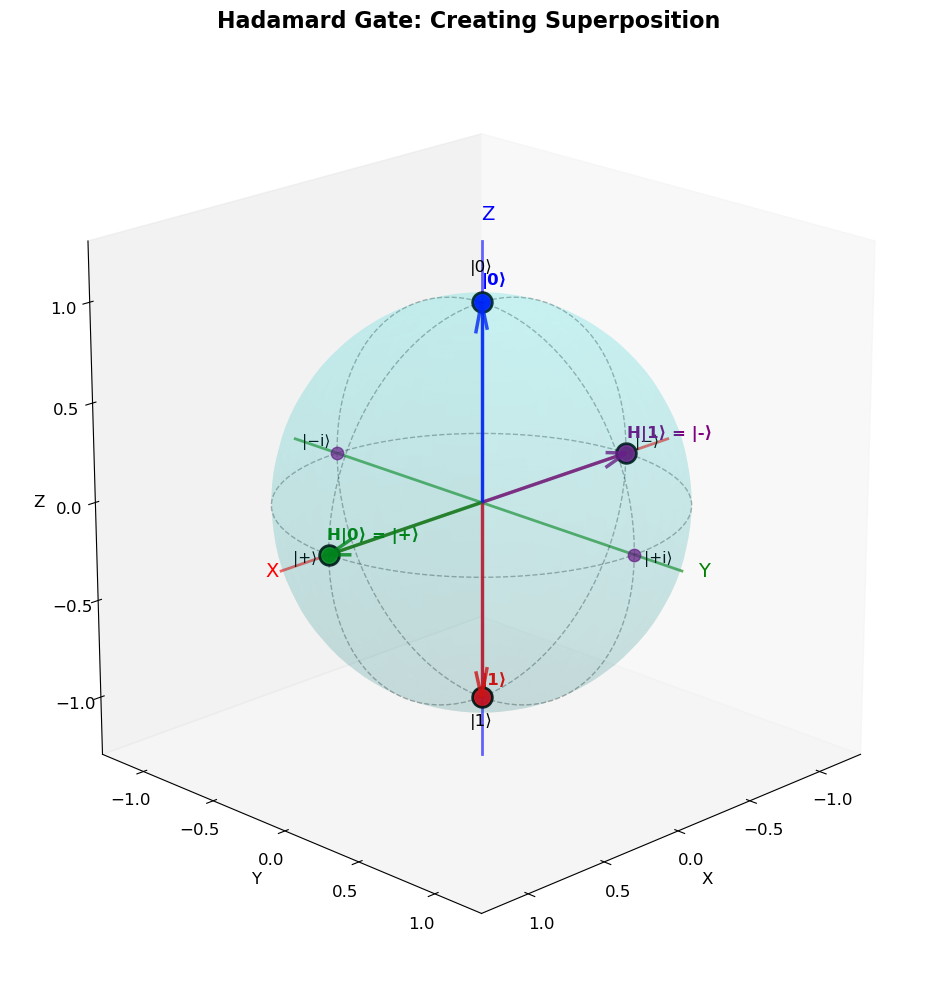

In [27]:
# Visualize Hadamard transformation
bloch = BlochSphere(figsize=(12, 10))
bloch.add_qubit(ket_0(), label="|0⟩", color='blue')
bloch.add_qubit(apply_gate(ket_0(), HADAMARD), label="H|0⟩ = |+⟩", color='green')
bloch.add_qubit(ket_1(), label="|1⟩", color='red')
bloch.add_qubit(apply_gate(ket_1(), HADAMARD), label="H|1⟩ = |-⟩", color='purple')
bloch.show(title="Hadamard Gate: Creating Superposition")

### 3.4 Phase Gates

**S Gate** (Phase gate):
$$S = \begin{pmatrix} 1 & 0 \\ 0 & i \end{pmatrix}$$

**T Gate** ($\pi/8$ gate):
$$T = \begin{pmatrix} 1 & 0 \\ 0 & e^{i\pi/4} \end{pmatrix}$$

**Properties:**
- $S^2 = Z$ (applying S twice gives Z)
- $T^2 = S$ (applying T twice gives S)
- Both are 90° and 45° rotations around the Z-axis

---

In [28]:
# Demonstrate phase gates
q_plus = ket_plus()

print("Phase Gates on |+⟩:")
print("="*50)
print(f"Initial:  {q_plus}")
print(f"After S:  {apply_gate(q_plus, S_GATE)}")
print(f"After T:  {apply_gate(q_plus, T_GATE)}")

Phase Gates on |+⟩:
Initial:  0.71|0⟩ + 0.71|1⟩
After S:  0.71|0⟩ + (0.00+0.71j)|1⟩
After T:  0.71|0⟩ + (0.50+0.50j)|1⟩


### 3.5 Rotation Gates

General rotations around the Bloch sphere axes:

$$R_x(\theta) = e^{-i\theta X/2} = \begin{pmatrix} \cos\frac{\theta}{2} & -i\sin\frac{\theta}{2} \\ -i\sin\frac{\theta}{2} & \cos\frac{\theta}{2} \end{pmatrix}$$

$$R_y(\theta) = e^{-i\theta Y/2} = \begin{pmatrix} \cos\frac{\theta}{2} & -\sin\frac{\theta}{2} \\ \sin\frac{\theta}{2} & \cos\frac{\theta}{2} \end{pmatrix}$$

$$R_z(\theta) = e^{-i\theta Z/2} = \begin{pmatrix} e^{-i\theta/2} & 0 \\ 0 & e^{i\theta/2} \end{pmatrix}$$

---

In [29]:
# Demonstrate rotation gates
q = ket_0()
angle = np.pi / 4  # 45 degrees

print(f"Rotation Gates (θ = π/4):")
print("="*50)
print(f"Initial:    {q}")
print(f"Rx(π/4):    {apply_gate(q, rx(angle))}")
print(f"Ry(π/4):    {apply_gate(q, ry(angle))}")
print(f"Rz(π/4):    {apply_gate(q, rz(angle))}")

Rotation Gates (θ = π/4):
Initial:    |0⟩
Rx(π/4):    0.92|0⟩ + (0.00-0.38j)|1⟩
Ry(π/4):    0.92|0⟩ + 0.38|1⟩
Rz(π/4):    (0.92-0.38j)|0⟩


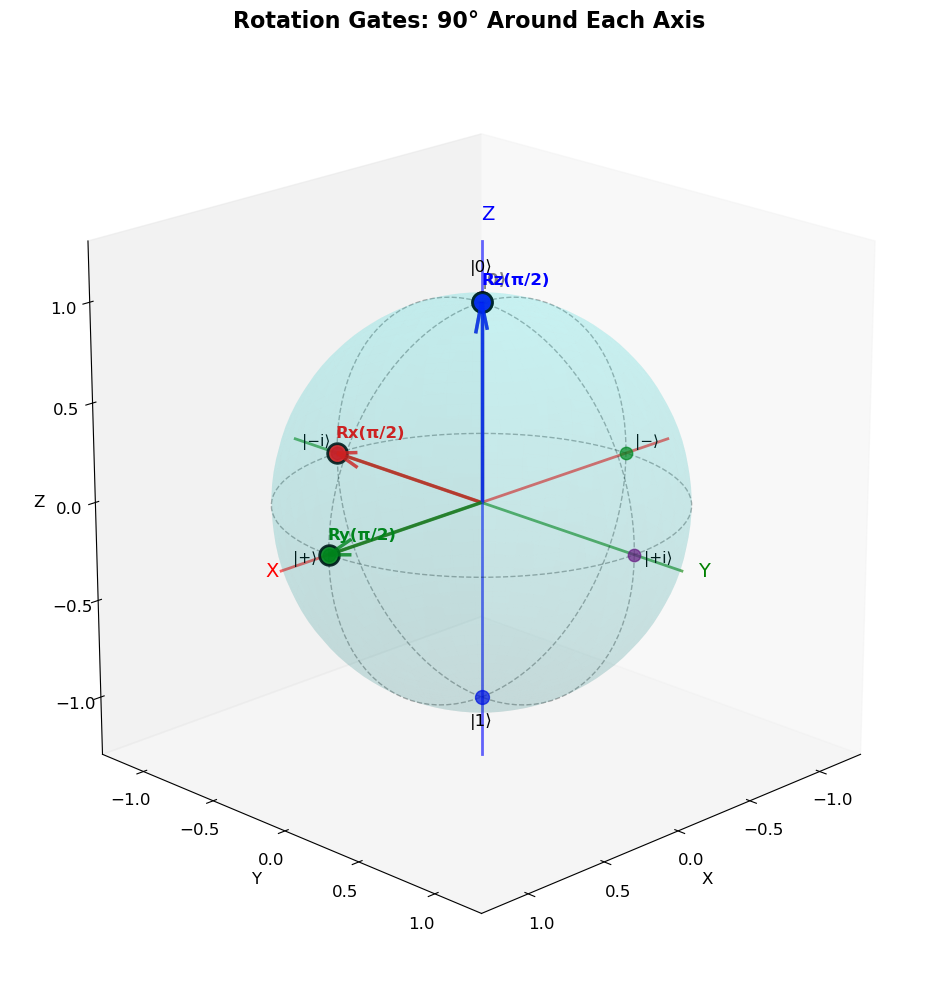

In [30]:
# Visualize rotations
q0 = ket_0()
angle = np.pi / 2  # 90 degrees for clearer visualization

bloch = BlochSphere(figsize=(12, 10))
bloch.add_qubit(q0, label="|0⟩", color='gray')
bloch.add_qubit(apply_gate(q0, rx(angle)), label="Rx(π/2)", color='red')
bloch.add_qubit(apply_gate(q0, ry(angle)), label="Ry(π/2)", color='green')
bloch.add_qubit(apply_gate(q0, rz(angle)), label="Rz(π/2)", color='blue')
bloch.show(title="Rotation Gates: 90° Around Each Axis")

### 3.6 Gate Sequences and Trajectories

We can apply multiple gates in sequence. The trajectory shows how the qubit state moves on the Bloch sphere:

In [31]:
# Apply a sequence of gates
initial = ket_0()
gates = [HADAMARD, S_GATE, HADAMARD]
gate_names = ['H', 'S', 'H']

print("Gate Sequence: |0⟩ → H → S → H")
print("="*50)
current = initial.copy()
print(f"Start:    {current}")

for gate, name in zip(gates, gate_names):
    current = apply_gate(current, gate)
    print(f"After {name}:  {current}")

Gate Sequence: |0⟩ → H → S → H
Start:    |0⟩
After H:  0.71|0⟩ + 0.71|1⟩
After S:  0.71|0⟩ + (0.00+0.71j)|1⟩
After H:  (0.50+0.50j)|0⟩ + (0.50-0.50j)|1⟩


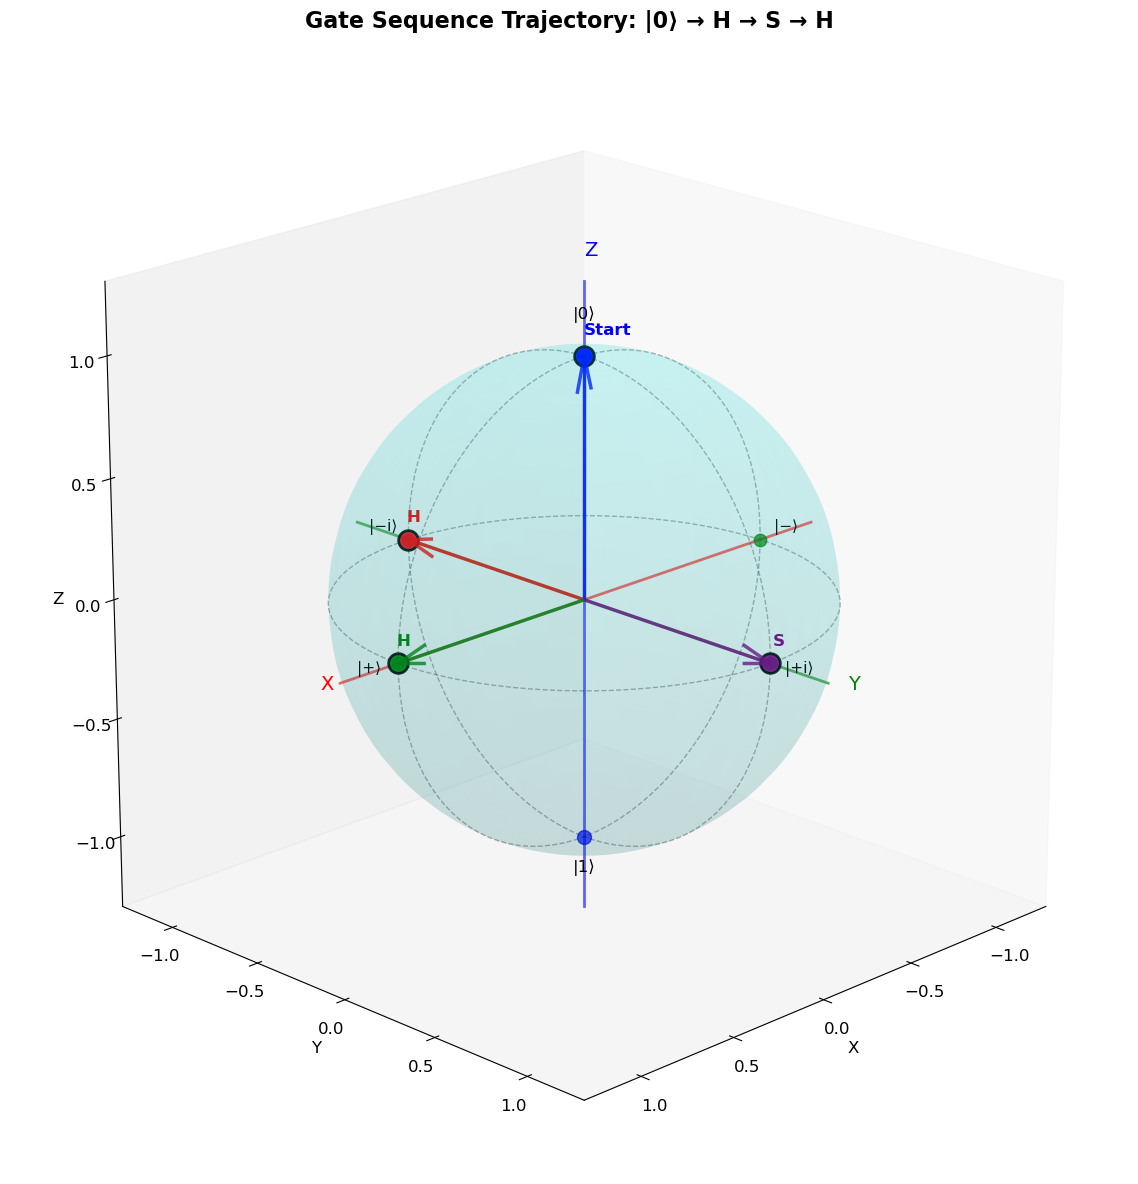

In [32]:
# Visualize the trajectory
bloch = BlochSphere(figsize=(14, 12))

current = ket_0()
colors = ['blue', 'green', 'purple', 'red']
labels = ['Start'] + gate_names

bloch.add_qubit(current, label='Start', color=colors[0])

for i, (gate, name) in enumerate(zip(gates, gate_names)):
    current = apply_gate(current, gate)
    bloch.add_qubit(current, label=name, color=colors[i+1])

bloch.show(title="Gate Sequence Trajectory: |0⟩ → H → S → H")

---

## 4. Measurement and the Born Rule

### 4.1 The Measurement Postulate

When we measure a qubit $|\psi\rangle = \alpha|0\rangle + \beta|1\rangle$ in the computational basis:

- **Probability of outcome $|0\rangle$:** $P(0) = |\alpha|^2 = |\langle 0|\psi\rangle|^2$
- **Probability of outcome $|1\rangle$:** $P(1) = |\beta|^2 = |\langle 1|\psi\rangle|^2$

After measurement, the state **collapses** to the measured eigenstate.

This is the **Born rule** - the fundamental connection between quantum amplitudes and classical probabilities.

---

### 4.2 Measuring Deterministic States

For basis states, measurement is deterministic:

In [33]:
# Measure |0⟩ many times
q0 = ket_0()
results = q0.measure(shots=100)

zeros = np.sum(results == 0)
ones = np.sum(results == 1)

print("Measuring |0⟩ state 100 times:")
print(f"  Results: {zeros} × |0⟩, {ones} × |1⟩")
print(f"  As expected: always |0⟩!")

# Measure |1⟩ many times
q1 = ket_1()
results = q1.measure(shots=100)

zeros = np.sum(results == 0)
ones = np.sum(results == 1)

print("\nMeasuring |1⟩ state 100 times:")
print(f"  Results: {zeros} × |0⟩, {ones} × |1⟩")
print(f"  As expected: always |1⟩!")

Measuring |0⟩ state 100 times:
  Results: 100 × |0⟩, 0 × |1⟩
  As expected: always |0⟩!

Measuring |1⟩ state 100 times:
  Results: 0 × |0⟩, 100 × |1⟩
  As expected: always |1⟩!


### 4.3 Measuring Superposition States

For superposition states, outcomes are probabilistic:

In [34]:
# Measure |+⟩ many times
q_plus = ket_plus()
results = q_plus.measure(shots=1000)

zeros = np.sum(results == 0)
ones = np.sum(results == 1)

print("Measuring |+⟩ state 1000 times:")
print(f"  State: {q_plus}")
print(f"  Theoretical: P(0) = {q_plus.prob_0():.4f}, P(1) = {q_plus.prob_1():.4f}")
print(f"  Results: {zeros} × |0⟩, {ones} × |1⟩")
print(f"  Experimental: P(0) = {zeros/1000:.4f}, P(1) = {ones/1000:.4f}")
print(f"  Excellent agreement with theory!")

Measuring |+⟩ state 1000 times:
  State: 0.71|0⟩ + 0.71|1⟩
  Theoretical: P(0) = 0.5000, P(1) = 0.5000
  Results: 512 × |0⟩, 488 × |1⟩
  Experimental: P(0) = 0.5120, P(1) = 0.4880
  Excellent agreement with theory!


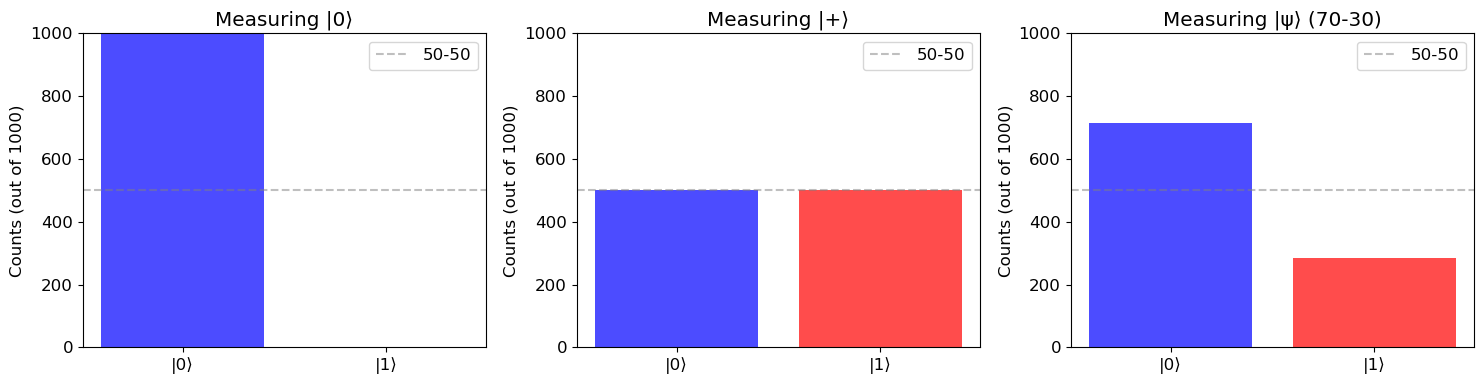

In [35]:
# Visualize measurement statistics
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Test three different states
states = [
    (ket_0(), "|0⟩"),
    (ket_plus(), "|+⟩"),
    (Qubit([np.sqrt(0.7), np.sqrt(0.3)]), "|ψ⟩ (70-30)")
]

for i, (state, label) in enumerate(states):
    results = state.measure(shots=1000)
    
    zeros = np.sum(results == 0)
    ones = np.sum(results == 1)
    
    axes[i].bar(['|0⟩', '|1⟩'], [zeros, ones], color=['blue', 'red'], alpha=0.7)
    axes[i].axhline(500, color='gray', linestyle='--', alpha=0.5, label='50-50')
    axes[i].set_ylabel('Counts (out of 1000)')
    axes[i].set_title(f'Measuring {label}')
    axes[i].set_ylim([0, 1000])
    axes[i].legend()

plt.tight_layout()
plt.show()

---

## 5. Two-Qubit Systems and Entanglement

### 5.1 Tensor Product

For two qubits, the combined state space is $\mathbb{C}^2 \otimes \mathbb{C}^2 = \mathbb{C}^4$.

For product states:
$$|\psi\rangle \otimes |\phi\rangle = (\alpha_1|0\rangle + \beta_1|1\rangle) \otimes (\alpha_2|0\rangle + \beta_2|1\rangle)$$
$$= \alpha_1\alpha_2|00\rangle + \alpha_1\beta_2|01\rangle + \beta_1\alpha_2|10\rangle + \beta_1\beta_2|11\rangle$$

---

In [36]:
# Create a product state
q0 = ket_0()
q1 = ket_1()

system = tensor_product(q0, q1)  # |01⟩

print("Product State: |0⟩ ⊗ |1⟩ = |01⟩")
print("="*50)
print(f"State vector: {system.state}")
print(f"Is entangled? {system.is_entangled()}")
print("\nThis is a separable (non-entangled) state.")

Product State: |0⟩ ⊗ |1⟩ = |01⟩
State vector: [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
Is entangled? False

This is a separable (non-entangled) state.


### 5.2 Entanglement

A two-qubit state is **entangled** if it cannot be written as a tensor product.

The **Bell states** are maximally entangled:

$$|\Phi^+\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$$
$$|\Phi^-\rangle = \frac{1}{\sqrt{2}}(|00\rangle - |11\rangle)$$
$$|\Psi^+\rangle = \frac{1}{\sqrt{2}}(|01\rangle + |10\rangle)$$
$$|\Psi^-\rangle = \frac{1}{\sqrt{2}}(|01\rangle - |10\rangle)$$

---

In [37]:
# Create Bell state |Φ+⟩
bell = bell_phi_plus()

print("Bell State |Φ+⟩ = (|00⟩ + |11⟩)/√2")
print("="*50)
print(f"State vector: {bell.state}")
print(f"Is entangled? {bell.is_entangled()}")
print(f"Entanglement entropy: {bell.entanglement_entropy():.4f}")
print("\nEntropy = 1.0 means maximum entanglement!")

Bell State |Φ+⟩ = (|00⟩ + |11⟩)/√2
State vector: [0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]
Is entangled? True
Entanglement entropy: 1.0000

Entropy = 1.0 means maximum entanglement!


### 5.3 Creating Entanglement with CNOT

The **CNOT gate** (Controlled-NOT) is a two-qubit gate:

$$\text{CNOT} = \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{pmatrix}$$

**Effect:** Flips the second qubit if the first qubit is $|1\rangle$.

**Creating a Bell state:**
$$\text{CNOT}(H \otimes I)|00\rangle = \text{CNOT}\frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) \otimes |0\rangle$$
$$= \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle) = |\Phi^+\rangle$$

---

In [38]:
# Create Bell state step-by-step
print("Creating Entanglement with CNOT:")
print("="*50)

# Start with |00⟩
system = tensor_product(ket_0(), ket_0())
print(f"1. Start with |00⟩")
print(f"   State: {system.state}")
print(f"   Entangled? {system.is_entangled()}")

# Apply H ⊗ I
system = apply_single_qubit_gate(system, HADAMARD, 0)
print(f"\n2. Apply H ⊗ I (Hadamard on first qubit)")
print(f"   State: {system.state}")
print(f"   Entangled? {system.is_entangled()}")
print(f"   Still separable: (|0⟩+|1⟩)/√2 ⊗ |0⟩")

# Apply CNOT
system = apply_gate_to_system(system, CNOT)
print(f"\n3. Apply CNOT")
print(f"   State: {system.state}")
print(f"   Entangled? {system.is_entangled()}")
print(f"   Entropy: {system.entanglement_entropy():.4f}")
print(f"\n   SUCCESS! Created Bell state |Φ+⟩")

Creating Entanglement with CNOT:
1. Start with |00⟩
   State: [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
   Entangled? False

2. Apply H ⊗ I (Hadamard on first qubit)
   State: [0.70710678+0.j 0.        +0.j 0.70710678+0.j 0.        +0.j]
   Entangled? False
   Still separable: (|0⟩+|1⟩)/√2 ⊗ |0⟩

3. Apply CNOT
   State: [0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]
   Entangled? True
   Entropy: 1.0000

   SUCCESS! Created Bell state |Φ+⟩


### 5.4 All Four Bell States

In [39]:
# Display all Bell states
bell_states = [
    (bell_phi_plus(), "|Φ+⟩", "(|00⟩ + |11⟩)/√2"),
    (bell_phi_minus(), "|Φ-⟩", "(|00⟩ - |11⟩)/√2"),
]

print("All Bell States (Maximally Entangled):")
print("="*70)

for state, name, formula in bell_states:
    print(f"\n{name} = {formula}")
    print(f"  State vector: {state.state}")
    print(f"  Entanglement entropy: {state.entanglement_entropy():.4f}")
    
    # Schmidt decomposition
    coeffs, basis_A, basis_B = state.schmidt_decomposition()
    print(f"  Schmidt coefficients: {coeffs}")

All Bell States (Maximally Entangled):

|Φ+⟩ = (|00⟩ + |11⟩)/√2
  State vector: [0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]
  Entanglement entropy: 1.0000
  Schmidt coefficients: [0.70710678 0.70710678]

|Φ-⟩ = (|00⟩ - |11⟩)/√2
  State vector: [ 0.70710678+0.j  0.        +0.j  0.        +0.j -0.70710678+0.j]
  Entanglement entropy: 1.0000
  Schmidt coefficients: [0.70710678 0.70710678]


---

## 6. Summary and Key Takeaways

### What We've Learned

1. **Qubits**: Quantum states in $\mathbb{C}^2$ with superposition
2. **Bloch Sphere**: Geometric visualization of single-qubit states
3. **Quantum Gates**: Unitary operations (Pauli, Hadamard, rotations, phase gates)
4. **Measurement**: Born rule connects quantum amplitudes to probabilities
5. **Two-Qubits**: Tensor products and entanglement
6. **Bell States**: Maximally entangled states created with CNOT

### Key Equations

**Qubit state:**
$$|\psi\rangle = \alpha|0\rangle + \beta|1\rangle, \quad |\alpha|^2 + |\beta|^2 = 1$$

**Born rule:**
$$P(i) = |\langle i|\psi\rangle|^2$$

**Unitary evolution:**
$$|\psi'\rangle = U|\psi\rangle, \quad U^\dagger U = I$$

**Entanglement:** State cannot be written as $|\psi_A\rangle \otimes |\psi_B\rangle$

---

### Next Steps: Phase 2

- Bell inequalities (CHSH)
- Quantum vs classical correlations
- Density matrices for mixed states
- Quantum teleportation

---

## References

- Imperial College London: Quantum Information and Computation Course Notes
- Nielsen & Chuang: *Quantum Computation and Quantum Information*
- Our implementation: `phase1_qubits` Python package

---

**🎉 Phase 1 Complete!**